In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1: Read data from CSV and rename columns
data = pd.read_csv('/content/dataset.csv')

# Rename PubchemFP columns to x1, x2, x3, ..., x881
new_column_names = ['x{}'.format(i) for i in range(1, 882)]
data.columns = new_column_names + ['pIC50']  # Assuming the last column is pIC50

# Prepare data for modeling
X = data[new_column_names]  # Features
y = data['pIC50']  # Target variable

In [9]:
# Step 2: Remove low variance features
threshold_var = 0.2  # Define threshold for variance
selector = VarianceThreshold(threshold=threshold_var)
X_filtered = selector.fit_transform(X)

# Get selected feature indices and apply to original feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Update X with filtered features
X = pd.DataFrame(X_filtered, columns=selected_features)

In [10]:
# Step 3: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [11]:
# Step 5: Apply Principal Component Analysis (PCA) for feature extraction
n_components = 131  # Define the number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

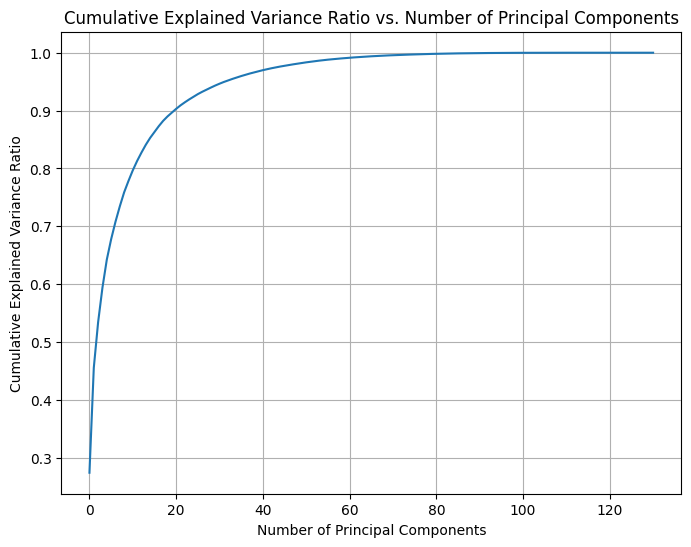

In [12]:
# Optional: Plot explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_var_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.savefig('variance vs num_pca.png')
plt.show()